<a href="https://colab.research.google.com/github/IshantWadhwa4/COVID-19-EDA/blob/master/covid19_Classification_by_Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
# world data of confirmed cases
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_confirmed = pd.read_csv(url_confirmed)
data_confirmed['Province/State'].fillna(data_confirmed['Country/Region'],inplace = True)

In [0]:
# world data of death cases
url_Deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
data_death = pd.read_csv(url_Deaths)
data_death['Province/State'].fillna(data_death['Country/Region'],inplace = True)


In [0]:
# world data of Recovered cases
url_Recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
data_Recovered = pd.read_csv(url_Recovered)
data_Recovered['Province/State'].fillna(data_Recovered['Country/Region'],inplace = True)

### list of country having more than 800 cases



In [0]:
data_confirmed_number = data_confirmed.melt(id_vars=["Province/State", "Country/Region","Lat","Long"], 
        var_name="Date", 
        value_name="confirmed")

In [0]:
data_500 = data_confirmed_number[data_confirmed_number['confirmed'] >  800]

In [0]:
country = list(set(data_500['Country/Region']))

#### Get data for above countries

In [0]:
data_confirmed = data_confirmed[data_confirmed['Country/Region'].isin(country)]

In [0]:
confirmed_cases = data_confirmed.drop(["Province/State","Lat","Long"],axis=1)

In [0]:
confirmed_cases = confirmed_cases.groupby('Country/Region').sum()

In [0]:
confirmed_cases_country = confirmed_cases.index.tolist()

In [0]:
confirmed_cases = confirmed_cases.values

#### prepare Data

In [0]:
from sklearn.preprocessing import normalize # to rescale the data
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [0]:
normalize_confirmed_cases = normalize(confirmed_cases)

In [63]:
normalize_confirmed_cases

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.00624524e-01, 4.48100668e-01, 5.18958458e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.04597180e-01, 4.48400725e-01, 4.84357110e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.81839421e-01, 4.46081531e-01, 5.59377911e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.39377223e-01, 5.32866194e-01, 6.92221054e-01],
       [4.78257398e-06, 4.78257398e-06, 9.56514797e-06, ...,
        4.00951873e-01, 4.86182124e-01, 5.80977523e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.81038509e-01, 4.75652965e-01, 5.58460775e-01]])

In [0]:
mergings = linkage(normalize_confirmed_cases, method='complete')

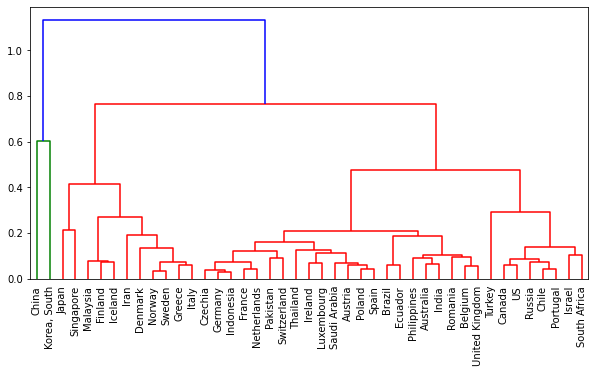

In [65]:
# the first line is written for you - it sets the size of your plot
plt.figure(figsize=(10, 5))

dendrogram(
    mergings,
    labels=confirmed_cases_country,
    leaf_rotation=90.,
    leaf_font_size=10
)
plt.show()

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')
model.fit(normalize_confirmed_cases)
labels = model.labels_

In [69]:
len(labels)

43

In [0]:
country_classification = pd.DataFrame(confirmed_cases)

In [0]:
country_classification.columns = data_confirmed.columns[4:] 

In [0]:
country_classification['Country'] = confirmed_cases_country
country_classification['labels'] = labels

In [0]:
country_classification['Total_cases'] = country_classification['3/28/20']

In [83]:
country_classification['Total_cases']

0       3640
1       8271
2       9134
3       3904
4       5576
5       1909
6      81999
7       2631
8       2366
9       1823
10      1167
11     38105
12     57695
13      1061
14       963
15       987
16      1155
17     35408
18      2415
19      3619
20     92472
21      1693
22      9478
23      1831
24      2320
25      9819
26      4015
27      1495
28      1075
29      1638
30      5170
31      1452
32      1264
33      1203
34       802
35      1187
36     73235
37      3447
38     14076
39      1245
40      7402
41    121478
42     17312
Name: Total_cases, dtype: int64

In [0]:
import seaborn as sns
% matplotlib inline



In [84]:
import plotly.express as px
fig = px.histogram(country_classification, x="Country", color="labels",y="Total_cases",histfunc='max')
fig.show()